Pmdarima is a statistical library designed to fill teh void in Pyhon's TS analysis capabilities.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'JPM.csv', parse_dates = True)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,5.129630,5.018519,5.037037,1.122904,62775
1,1980-03-18,0.0,5.111111,5.037037,5.074074,1.131161,64125
2,1980-03-19,0.0,5.166667,5.111111,5.148148,1.147674,40500
3,1980-03-20,0.0,5.148148,5.092593,5.111111,1.139418,18900
4,1980-03-21,0.0,5.222222,5.111111,5.222222,1.164188,97200
5,1980-03-24,0.0,5.185185,5.092593,5.092593,1.135290,90450
6,1980-03-25,0.0,5.111111,5.055556,5.074074,1.131161,72225
7,1980-03-26,0.0,5.148148,5.037037,5.111111,1.139418,31725
8,1980-03-27,0.0,5.092593,4.925926,5.074074,1.131161,62100
9,1980-03-28,0.0,5.074074,4.925926,5.018519,1.118777,84375


Perform Exploratory Data Analysis using line, histogram and kernel density estimation (KDE) of the closing price of the stocks. EDA is the process of using a graphical representation to discover and investigate patterns within data.


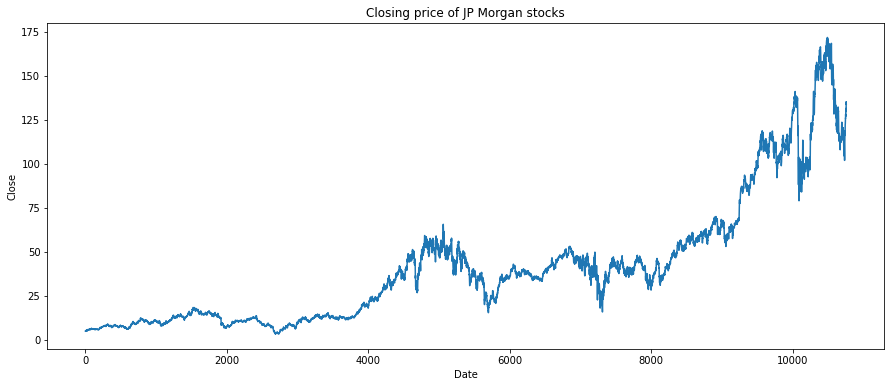

In [ ]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of JP Morgan stocks")
plt.show()

KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

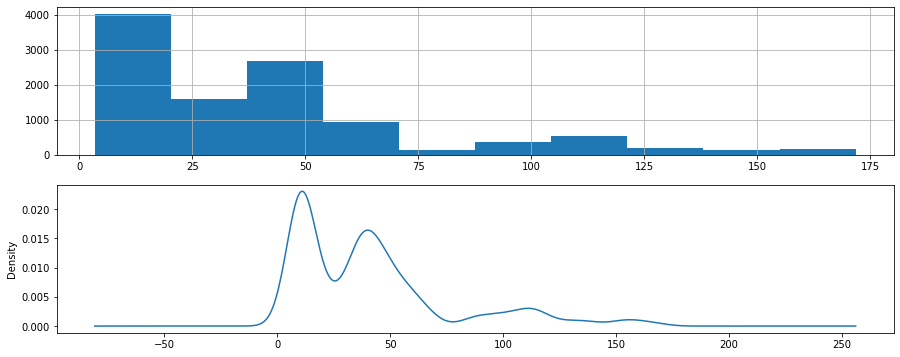

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

Define the TS evaluation function.

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

ADF test function to check for stationary data.

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                    -0.324347
p-value                            0.921985
No Lags Used                      39.000000
Number of Observations Used    10719.000000
Critical Value (1%)               -3.430960
Critical Value (5%)               -2.861810
Critical Value (10%)              -2.566914
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Close is non-stationary and auto-arima handles this internally.

Model training will be done only for the Close column from the dataset. Make a copy of the data and perform the test/train split.

The train will have all the data except the last 30 days and test will contain only the last 30 days to evaluate against predictions.

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

The pmdarima modeule will help us to identify p, d, q without the hassle of looking at the plot.

In [ ]:

stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31117.011, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31164.583, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31120.618, Time=0.97 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31122.923, Time=1.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31163.502, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31117.636, Time=9.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31117.296, Time=11.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31116.350, Time=3.94 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=31114.785, Time=6.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=31113.636, Time=22.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=31112.600, Time=19.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31038.913, Time=20.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=31040.702, Time=24.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31115.417, Time=15.98 sec
 ARIMA(3,1,3)

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10729
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -15511.880
Date:                Mon, 05 Dec 2022   AIC                          31037.760
Time:                        14:26:47   BIC                          31088.724
Sample:                             0   HQIC                         31054.951
                              - 10729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7332      0.039    -18.677      0.000      -0.810      -0.656
ar.L2          0.6677      0.061     10.925      0.000       0.548       0.788
ar.L3          0.7555      0.029     25.628      0.000       0.698       0.813
ma.L1          0.6679      0.039     17.152      0.000       0.592       0.744
ma.L2         -0.6896      0.057    -12.171      0.000      -0.801      -0.579
ma.L3         -0.7065      0.026    -27.049      0.000      -0.758      -0.655
sigma2         1.0553      0.004    246.213      0.000       1.047       1.064
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):            250919.10
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              58.40   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto-ARIMA says **ARIMA(3,1,3)** is the optimal selection for the dataset.

Forecast both results and the confidence for the next 30 days and store it in a DataFrame.

**Confidence** is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

**return_conf_int=True:** Whether to get the confidence intervals of the forecasts.

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 254.64719636969028
MAE is : 13.546780093520661
RMSE is : 15.957668888960264
MAPE is : 10.755199509648952
R2 is : -1.5896384814567304



Rearrange the indexes for the plots to align.

In [ ]:
forecast["new_index"] = range(1229, 1259)
forecast = forecast.set_index("new_index")

Plot the results with confidence bounds.

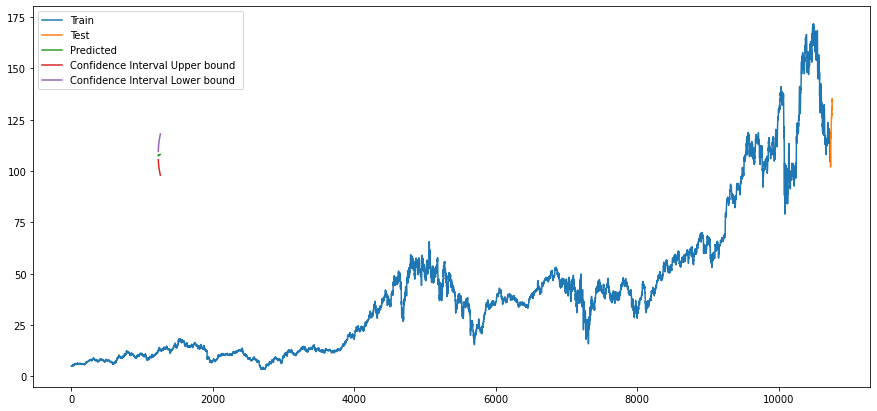

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

Plot the diagnostic Plot.

**Standardized Residual:** It's a measure of the strength of the difference between observed and expected values.

**Histogram plus estimated density:** KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

**Normal Q-Q:** Q-Q plots let you check that the data meet the assumption of normality. They compare the distribution of your data to a normal distribution by plotting the quartiles of your data against the quartiles of a normal distribution. If your data are normally distributed then they should form an approximately straight line.

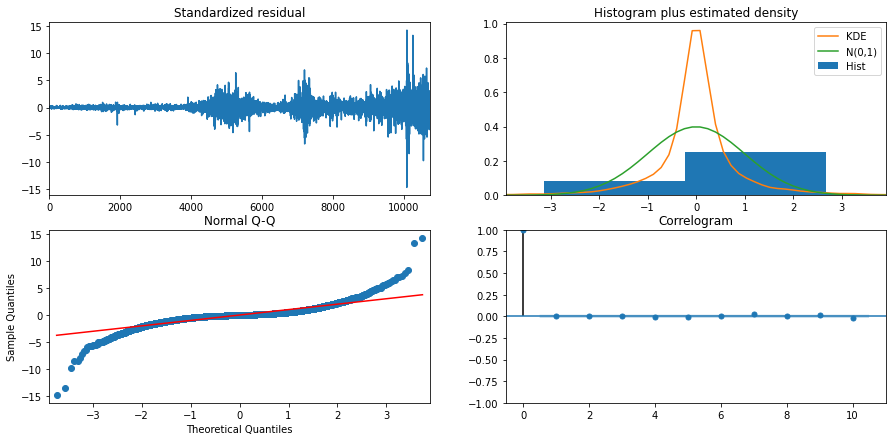

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,close_pred
new_index,
1229,107.472015
1230,107.777671
1231,107.611696
1232,107.742569
1233,107.766713
1234,107.711005
1235,107.866845
1236,107.733630
1237,107.893271
